# Práctica 4 – Recta de regresión

---

<font color='blue'>  <strong> Ejercicio 1.</strong>  En el archivo **`Poblacion.csv`** se encuentran las alturas y pesos de 1000 personas. Se pide:

a) Construir un diagrama de dispersión (nube de puntos) de las variables **altura** y **peso**.

b) Calcular la recta de regresión de **peso respecto a altura**.

c) Calcular el coeficiente de correlación \( r \) y el coeficiente de determinación \( R^2 \) y explicar qué información se deduce de ellos.  
¿Es bueno el ajuste dado por dicha recta?

d) Usar la recta de regresión del apartado anterior para predecir el **peso de una persona con altura 1.8**.



<strong> Ejercicio 2. </strong>  (Tiempos de ejecución de algoritmos) En el fichero **`tiempos.csv`** se encuentran datos sobre el tiempo que han tardado tres algoritmos en ordenar diferentes listas de números.  
Para cada experimento se ha almacenado:

- El algoritmo usado (entre 0 y 2),
- El máximo número de veces que se ha repetido algún elemento de la lista,
- La longitud de la lista,
- El tiempo necesario.

a) Construir un diagrama de dispersión (nube de puntos) de las variables **Tiempo** y **Longitud**.  
¿Parece correcto intentar calcular la recta de regresión de **Tiempo respecto a Longitud**?

b) Se quiere calcular aproximadamente, para cada algoritmo, el **orden de magnitud del tiempo necesario** para ordenar una lista en función de su longitud.  

Para ello, para cada algoritmo:
- Crear dos nuevas variables que contengan los **logaritmos de los tiempos** y las **longitudes** correspondientes.
- Hallar la **recta de regresión de los logaritmos de los tiempos respecto a los logaritmos de las longitudes**.
- Interpretar los resultados obtenidos.

c) Para el **primer algoritmo**, calcular la recta de regresión del **tiempo respecto al cuadrado de las longitudes**.  

Calcular el coeficiente de correlación \( r \) y el coeficiente de determinación \( R^2 \) y explicar qué información se deduce de ellos.  
¿Es bueno el ajuste dado por dicha recta?

d) Usar la recta de regresión del apartado anterior para predecir el tiempo que tardaría este algoritmo en ordenar dos listas de:

- 3000 elementos  
- 10000 elementos  

(Experimentalmente se obtuvieron tiempos de **0.623** y **7.61**, respectivamente).


e) Repetir el estudio del apartado anterior para el **tercer algoritmo**. </font>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Ejercicio 1: Alturas y pesos

### Carga de datos

In [3]:

dat = pd.read_csv("Poblacion.csv")
dat.head()


,Altura,Peso
0,1.682908,88.157238
1,1.852883,93.967476
2,1.745225,90.629197
3,1.662817,88.196229
4,1.724294,89.803281


### Nube de puntos

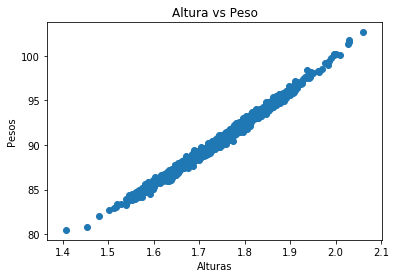

In [4]:
plt.scatter(dat["Altura"], dat["Peso"])
plt.xlabel("Alturas")
plt.ylabel("Pesos")
plt.title("Altura vs Peso")
plt.show()


### Ajuste por mínimos cuadrados

In [5]:
x = dat['Altura'].values
y = dat['Peso'].values

a, b = np.polyfit(x, y, 1)

print('a = ', a)
print('b = ', b)
print ('La recta de regresión es',a, 'x + ',b)

a =  35.01967507719219
b =  29.443269333811646
La recta de regresión es 35.01967507719219 x +  29.443269333811646


### Recta de regresión

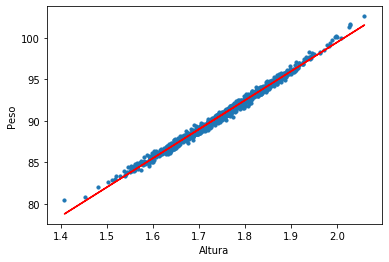

In [6]:
plt.scatter(x, y, s=10)
plt.plot(x, a*x + b,color="red")
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

### Predicción

In [7]:
altura = 1.8
peso_estimado = a * altura + b
peso_estimado

92.47868447275759

### Correlación y coeficiente de determinación

In [8]:
df =pd.DataFrame({'Altura':x,'Peso': y})
corr_matrix = df.corr()
corr_matrix

,Altura,Peso
Altura,1.000000,0.995189
Peso,0.995189,1.000000


Otra forma de hacer esto es: 

In [9]:
r=corr_matrix["Altura"][1]
R2=r*r
print("El coef. de correlación de Pearson es = ",r)
print("El coef. de determinación es = ",R2)

El coef. de correlación de Pearson es =  0.995188995491136
El coef. de determinación es =  0.9904011367466564


In [10]:

r, _ = pearsonr(x, y)
R2 = r**2
r, R2


(0.995188995491137, 0.9904011367466584)

## Ejercicio 2: Tiempos de algoritmos

In [11]:

datos = pd.read_csv("tiempos.csv")
datos.describe()


,Algoritmo,Max_repeticiones,Longitud,Tiempo
count,999.000000,999.000000,999.00000,999.000000
mean,1.016016,4.952953,1404.65966,0.066984
std,0.815521,0.746930,233.97178,0.061058
min,0.000000,3.000000,1000.00000,0.003205
25%,0.000000,4.000000,1200.00000,0.005487
50%,1.000000,5.000000,1413.00000,0.058914
75%,2.000000,5.000000,1609.00000,0.096247
max,2.000000,8.000000,1800.00000,0.221847


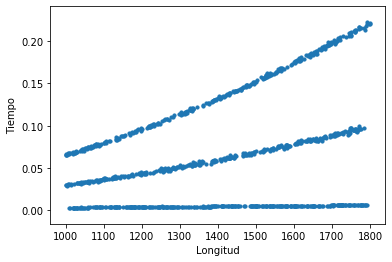

In [12]:
plt.scatter(datos["Longitud"], datos["Tiempo"], s=10)
plt.xlabel("Longitud")
plt.ylabel("Tiempo")
plt.show()


Si calculamos la recta de regresión, el resultado no puede ser bueno porque en realidad hay tres comportamientos distintos en la nube de puntos (uno para cada tipo de algoritmo)

In [13]:
x = datos['Longitud'].values
y = datos['Tiempo'].values

a, b = np.polyfit(x, y, 1)
a, b

(9.501145359262866e-05, -0.0664752304883898)

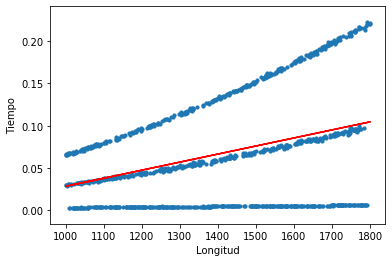

In [14]:
plt.scatter(x, y, s=10)
plt.plot(x, a*x + b,color="red")
plt.xlabel('Longitud')
plt.ylabel('Tiempo')
plt.show()

Separamos los datos. Tomamos los datos de cada algoritmo por separado:

In [15]:
alg0 = datos[datos["Algoritmo"] == 0]
alg1 = datos[datos["Algoritmo"] == 1]
alg2 = datos[datos["Algoritmo"] == 2]

Ahora los dibujamos y luego calculamos las correspondientes rectas de regresión:

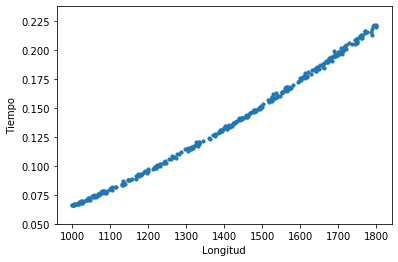

In [16]:
plt.scatter(alg0["Longitud"], alg0["Tiempo"], s=10)
plt.xlabel("Longitud")
plt.ylabel("Tiempo")
plt.show()

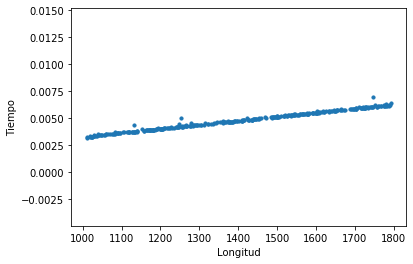

In [17]:
plt.scatter(alg1["Longitud"], alg1["Tiempo"], s=10)
plt.xlabel("Longitud")
plt.ylabel("Tiempo")
plt.show()

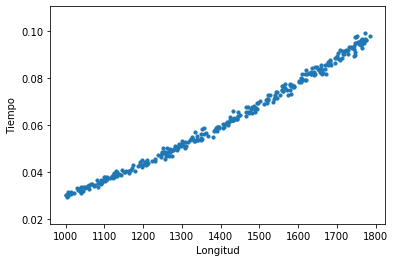

In [18]:
plt.scatter(alg2["Longitud"], alg2["Tiempo"], s=10)
plt.xlabel("Longitud")
plt.ylabel("Tiempo")
plt.show()

In [19]:
x = alg0['Longitud'].values
y = alg0['Tiempo'].values

a, b = np.polyfit(x, y, 1)
a, b

(0.00019426607679878254, -0.1358685065890578)

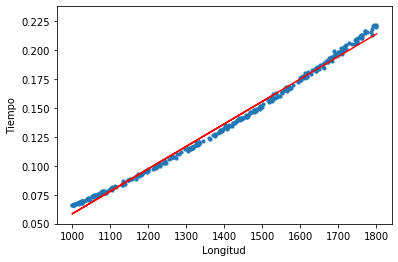

In [20]:
plt.scatter(x, y, s=10)
plt.plot(x, a*x + b,color="red", label="Recta ajustada")
plt.xlabel('Longitud')
plt.ylabel('Tiempo')
plt.show()

Si nos fijamos, parece que la nube de puntos se asemeja más a una parábola que a una recta. 

Pasemos al algoritmo 1:

In [21]:
x = alg1['Longitud'].values
y = alg1['Tiempo'].values

a, b = np.polyfit(x, y, 1)
a, b

(3.7539326635467875e-06, -0.0004851711203316387)

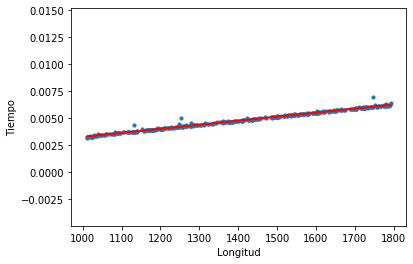

In [22]:
plt.scatter(x, y, s=10)
plt.plot(x, a*x + b,color="red", label="Recta ajustada")
plt.xlabel('Longitud')
plt.ylabel('Tiempo')
plt.show()

Aquí la nube parece encajar un poco mejor con la recta. 

Veamos el algoritmo 2:

In [23]:
x = alg2['Longitud'].values
y = alg2['Tiempo'].values

a, b = np.polyfit(x, y, 1)
a, b

(8.68405717412738e-05, -0.06013518725559707)

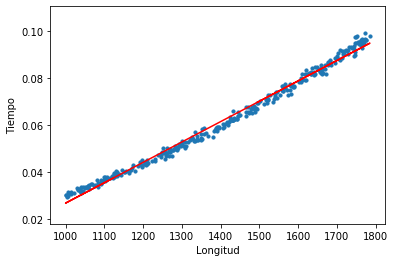

In [24]:
plt.scatter(x, y, s=10)
plt.plot(x, a*x + b,color="red", label="Recta ajustada")
plt.xlabel('Longitud')
plt.ylabel('Tiempo')
plt.show()

De nuevo la nube parece más una parábola que una recta...

En todo caso, es obvio que cada ''curva'' se encontraba asociada a uno de los algoritmos.

<font color='blue'> Se quiere calcular aproximadamente para cada algoritmo el orden de magnitud del tiempo necesario para ordenar una lista en función de la longitud de la misma. Para ello, para cada algoritmo crea dos nuevas variables que contengan los logaritmos de los tiempos y longitudes correspondientes. Hallar la recta de regresión de los logaritmos de los tiempos respecto a los logaritmos de las longitudes. Interpreta los resultados. </font> 

Es claro que si las variables $X,Y$ son tales que la recta de regresión $Z=aT+b$ de $Z=\log(Y)$ respecto de $T=\log(X)$ ajusta bien, es porque $\log(Y)\simeq a\log (X) +b$ y por tanto $$Y=\exp(\log(Y))\simeq \exp(a\log (X) +b)=\exp(\log(X^a))\exp(b)=K\cdot X^a,$$ lo que significa que $Y \simeq K\cdot X^a$. Es decir, el orden de magnitud de $Y$ en términos de $X$ sería $X^a$.  

logT0 ≈ 2.0768 · logL0 + -17.0708


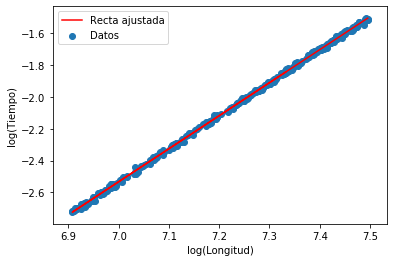

In [25]:
x = alg0['Longitud'].values
y = alg0['Tiempo'].values

logL0 = np.log(x)
logT0 = np.log(y)

# Ajuste lineal: logT0 = a * logL0 + b
a, b = np.polyfit(logL0, logT0, deg=1)

print(f"logT0 ≈ {a:.4f} · logL0 + {b:.4f}")

# Gráfico
plt.scatter(logL0, logT0, label="Datos")
plt.plot(logL0, a * logL0 + b, color="red", label="Recta ajustada")
plt.xlabel("log(Longitud)")
plt.ylabel("log(Tiempo)")
plt.legend()
plt.show()

La recta de regresión del logaritmo del tiempo respecto al logaritmo de la longitud parece encajar bien en este caso (i.e., para el algoritmo 0). 

De hecho, podemos medir los residuos:

In [26]:
logTprev = a * logL0 + b

# Residuos

res = logT0 - logTprev

# Media de los residuos

res_mean = np.mean(res)

print("Media de los residuos:", res_mean)

Media de los residuos: -1.4919478546968925e-15


Esto confirma que hay un buen encaje (más allá de la cuestión meramente visual).
Veamos qué valor es $a$:

In [27]:
a

2.076782727238062

Entonces la dependencia del tiempo en términos de la longitud es del tipo $t\simeq K \ell^{2.07}$, (que es aproximadamente cuadrática, en realidad) para cierta constante $K$.  

El tamaño de $K$ es importante porque  puede ser muy pequeña. De hecho, $K= \exp(b)$, donde $b$ vale:

In [28]:
b
K=np.exp(b)
K

3.856885648399566e-08

En la práctica podemos asumir que $t\simeq K \ell^{2}$.


Procedamos ahora con los otros dos algoritmos:

logT1 ≈ 1.1071 · logL1 + -13.3672


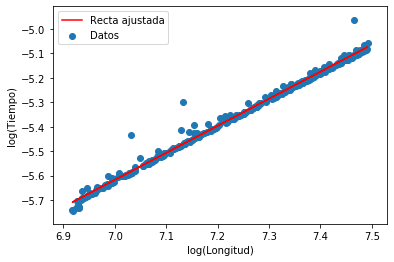

In [29]:
x = alg1['Longitud'].values
y = alg1['Tiempo'].values

logL1 = np.log(x)
logT1 = np.log(y)

# Ajuste lineal: logT0 = a * logL0 + b
a, b = np.polyfit(logL1, logT1, deg=1)

print(f"logT1 ≈ {a:.4f} · logL1 + {b:.4f}")

# Gráfico
plt.scatter(logL1, logT1, label="Datos")
plt.plot(logL1, a * logL1 + b, color="red", label="Recta ajustada")
plt.xlabel("log(Longitud)")
plt.ylabel("log(Tiempo)")
plt.legend()
plt.show()

In [30]:
logTprev = a * logL1 + b

# Residuos

res = logT1 - logTprev

# Media de los residuos

res_mean = np.mean(res)

print("Media de los residuos:", res_mean)

Media de los residuos: -4.645040571088416e-15


In [31]:
a

1.1071033338465401

Se sigue que la dependencia es ahora (casi) lineal, porque $a$ está muy cerca de $1$. En efecto, los datos dicen que $t\simeq K \ell^{1.1}\simeq K\ell$. 

In [32]:
b
K=np.exp(b)
K

1.5657117154630983e-06

<font color='red'>En realidad, sabemos que el algoritmo que hay detrás de estos cálculos tiene dependencia cuadrática -no lineal-, $T\leq K \ell^2$ pero esta solo se manifiesta para tamaños muy grandes de listas porque $K$ es muy pequeña. Esto hace que sobre nuestros datos la recta de regresión vaya bien y parezca que la dependencia es lineal -lo cual es falso- </font> 

En el último algoritmo, las cuentas son:

logT2 ≈ 2.0361 · logL2 + -17.5693


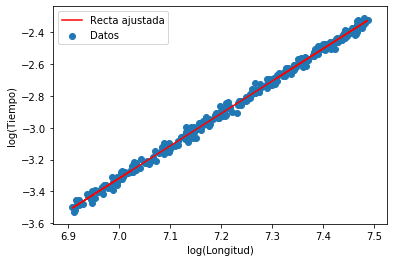

In [33]:
x = alg2['Longitud'].values
y = alg2['Tiempo'].values

logL2 = np.log(x)
logT2 = np.log(y)

# Ajuste lineal: logT0 = a * logL0 + b
a, b = np.polyfit(logL2, logT2, deg=1)

print(f"logT2 ≈ {a:.4f} · logL2 + {b:.4f}")

# Gráfico
plt.scatter(logL2, logT2, label="Datos")
plt.plot(logL2, a * logL2 + b, color="red", label="Recta ajustada")
plt.xlabel("log(Longitud)")
plt.ylabel("log(Tiempo)")
plt.legend()
plt.show()

In [34]:
logTprev = a * logL2 + b

# Residuos

res = logT2 - logTprev

# Media de los residuos

res_mean = np.mean(res)

print("Media de los residuos:", res_mean)

Media de los residuos: 6.475865595401795e-15


In [35]:
a

2.036109392939176

In [36]:
b
K=np.exp(b)
K

2.3429901710284825e-08

Se sigue que la dependencia es nuevamente (casi) cuadrática, porque $a$ está muy cerca de $2$: $t\simeq K \ell^{2.03}$. De nuevo lo razonable es asumir dependencia cuadrática: $$t\simeq K\ell^2.$$ 

<font color='blue'> Para el primer algoritmo, calcula la recta de regresión del tiempo respecto al cuadrado de las longitudes.</font> 

T0 ≈ 0.00000006980030 · L**2 + -0.00466207100190


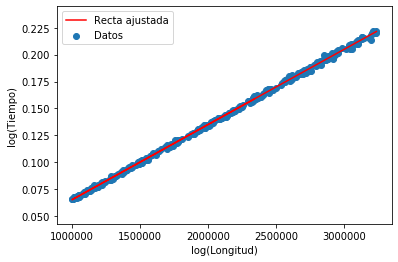

In [37]:
x = alg0['Longitud'].values
y = alg0['Tiempo'].values

x0 = x**2


# Ajuste lineal: logT0 = a * logL0 + b
a, b = np.polyfit(x0, y, deg=1)

print(f"T0 ≈ {a:.14f} · L**2 + {b:.14f}")

# Gráfico
plt.scatter(x0, y, label="Datos")
plt.plot(x0, a * x0 + b, color="red", label="Recta ajustada")
plt.xlabel("log(Longitud)")
plt.ylabel("log(Tiempo)")
plt.legend()
plt.show()

In [38]:
r = np.corrcoef(x0, y)[0, 1]
R2 = r**2

print("r =", r)
print("R2 =", R2)

r = 0.9996687645466708
R2 = 0.999337638810267


In [39]:
# 5. Predicciones usando la recta ajustada
def predecir_tiempo(longitud):
    z = longitud**2
    return a * z + b

t_3000 = predecir_tiempo(3000)
t_10000 = predecir_tiempo(10000)

print("Predicción para 3000 elementos:", t_3000)
print("Predicción para 10000 elementos:", t_10000)


Predicción para 3000 elementos: 0.6235406605690513
Predicción para 10000 elementos: 6.975368279786434


In [40]:
# 6. Valores ajustados y residuos
Tprev = a * x0 + b      # valores ajustados
res = y - Tprev        # residuos

# 7. Media de residuos
res_mean = np.mean(res)
print("Media de los residuos:", res_mean)

# 8. Varianzas
var_res = np.var(res, ddof=1)      # varianza muestral de residuos
var_Tprev = np.var(Tprev, ddof=1)  # varianza muestral de valores ajustados
var_T0 = np.var(x0, ddof=1)        # varianza muestral de T0

print("Varianza residuos:", var_res)
print("Varianza valores ajustados:", var_Tprev)
print("Varianza T0:", var_T0)

# 9. Relación R2 vs varianzas, comprobación
print("R2 calculado:", R2)
print("var(Tprev)/var(T0):", var_Tprev / var_T0)


Media de los residuos: 2.569960705150825e-18
Varianza residuos: 1.429386146247194e-06
Varianza valores ajustados: 0.002156586766376074
Varianza T0: 442641688438.42145
R2 calculado: 0.999337638810267
var(Tprev)/var(T0): 4.872082369792627e-15


In [41]:
r, _ = pearsonr(x0, y)
R2 = r**2
r, R2

(0.9996687645466708, 0.999337638810267)